In [1]:
# Herramientas para EDA
import pandas as pd
import numpy as np
import sidetable as stb
from datetime import timedelta
from datetime import date, datetime
import random 

# Herramientas para la Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.gridspec import GridSpec

# Transformación de datos

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Estadísticos
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

plt.rcParams["figure.figsize"] = (16,8)

import warnings
warnings.filterwarnings('ignore')

/Users/DataAnalytics/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/DataAnalytics/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df= pd.read_csv('../archivos/bikes_registrados.csv', index_col=0)
df.head()

,fecha,estacion,año,mes,dias_festivos,dias_laborales,clima,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_registrados,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,0,Nublado,14.110847,18.18125,80.5833,10.749882,654,lunes
1,2018-01-02,invierno,0,1,No Festivo,0,Nublado,14.902598,17.68695,69.6087,16.652113,670,martes
2,2018-01-03,invierno,0,1,No Festivo,1,Soleado,8.050924,9.47025,43.7273,16.636703,1229,miercoles
3,2018-01-04,invierno,0,1,No Festivo,1,Soleado,8.200000,10.60610,59.0435,10.739832,1454,jueves
4,2018-01-05,invierno,0,1,No Festivo,1,Soleado,9.305237,11.46350,43.6957,12.522300,1518,viernes


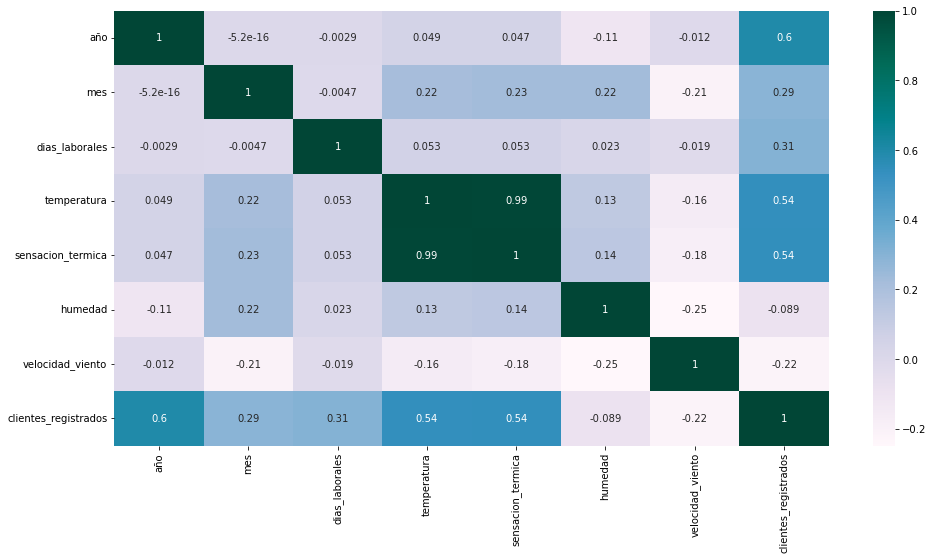

In [3]:
sns.heatmap(df.corr(), cmap= 'PuBuGn', annot= True);

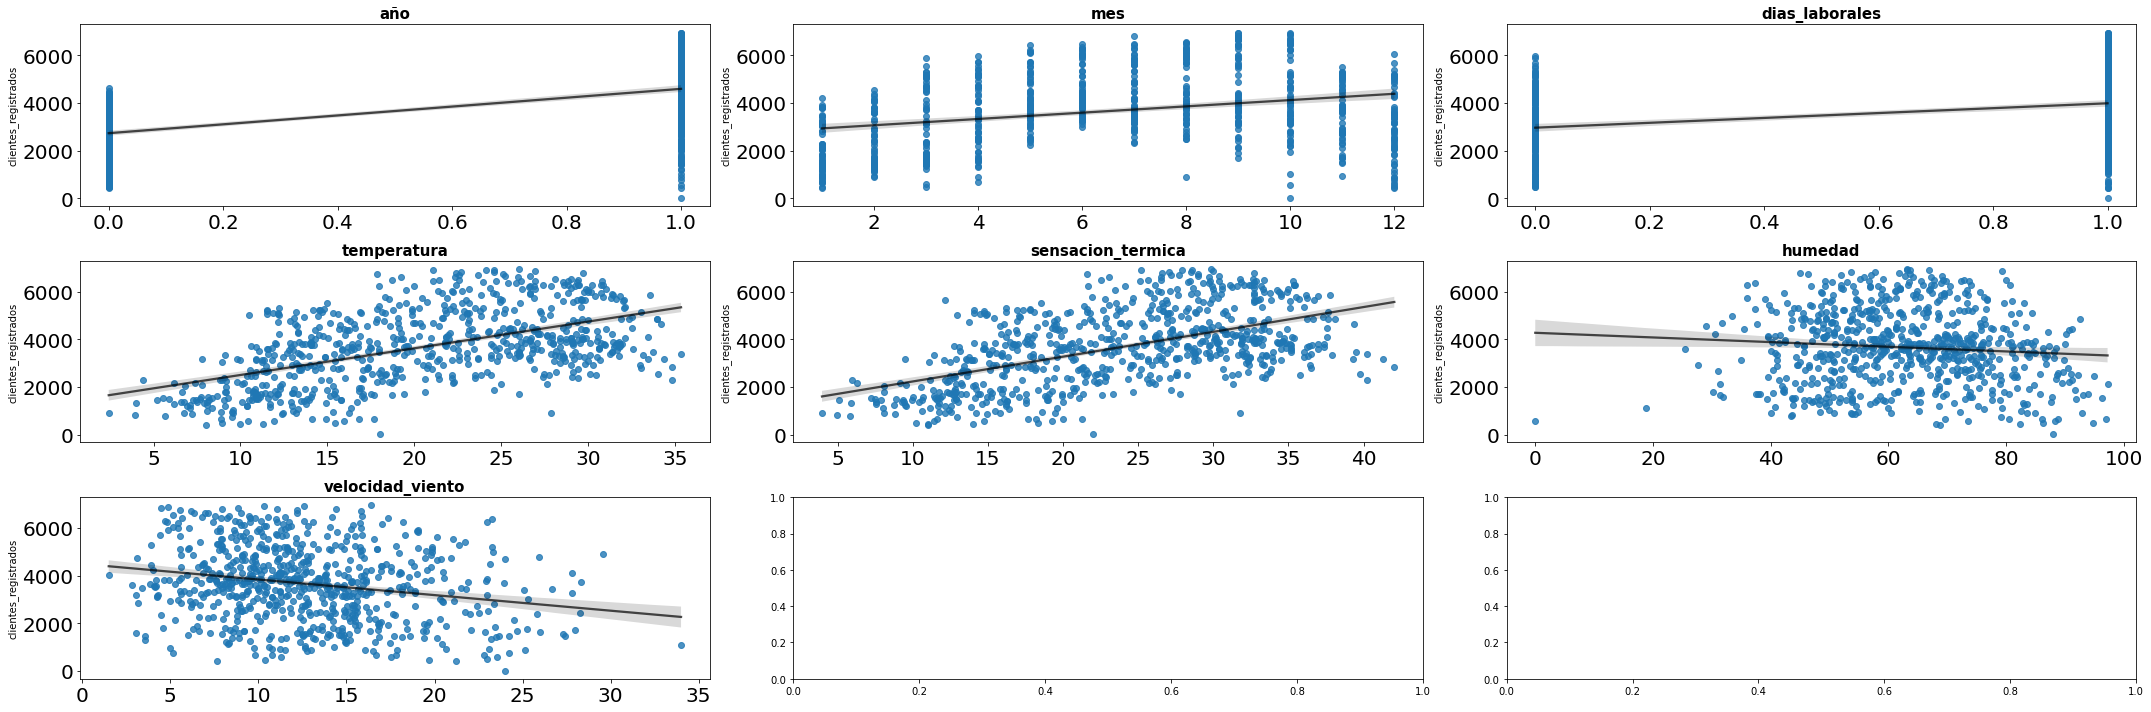

In [4]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 10))

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('clientes_registrados', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'clientes_registrados',
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

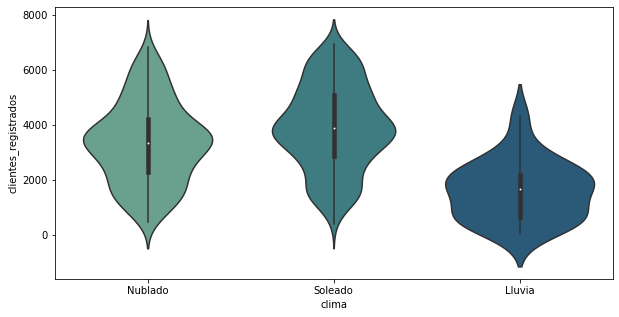

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'clima',
    y       = 'clientes_registrados',
    data    = df,
    palette = 'crest',
    ax      = ax
);

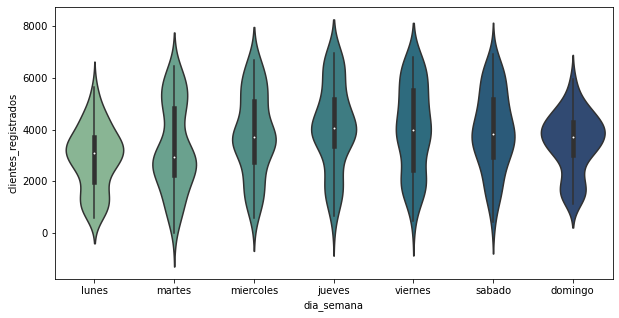

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'dia_semana',
    y       = 'clientes_registrados',
    data    = df,
    palette = 'crest',
    ax      = ax
);

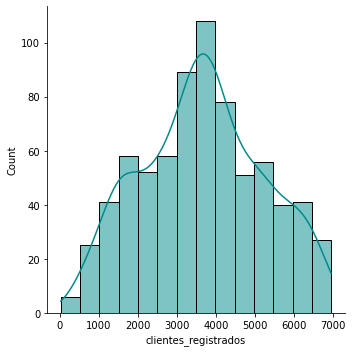

In [7]:
sns.displot(df['clientes_registrados'], kde = True, color = "darkcyan");

In [8]:
stats.shapiro(df['clientes_registrados'])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

In [9]:
lm = ols('clientes_registrados ~ año + mes + dias_festivos + dias_laborales + clima + temperatura + sensacion_termica + humedad + velocidad_viento + dia_semana',  data = df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
dias_festivos,11.0,5.492667e+07,4.993333e+06,9.989168,5.112830e-17
clima,2.0,1.400044e+08,7.000221e+07,140.039482,6.456142e-52
dia_semana,6.0,1.089881e+08,1.816468e+07,36.338468,2.057695e-38
año,1.0,5.930357e+08,5.930357e+08,1186.368450,4.554947e-153
mes,1.0,1.708042e+08,1.708042e+08,341.694015,1.777671e-62
dias_laborales,1.0,5.264147e+07,5.264147e+07,105.309319,4.056198e-23
temperatura,1.0,2.847284e+08,2.847284e+08,569.599463,1.142257e-92
sensacion_termica,1.0,4.556609e+06,4.556609e+06,9.115501,2.626265e-03
humedad,1.0,1.065638e+06,1.065638e+06,2.131810,1.447170e-01
velocidad_viento,1.0,1.138248e+07,1.138248e+07,22.770660,2.220938e-06


In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     clientes_registrados   R-squared:                       0.802
Model:                              OLS   Adj. R-squared:                  0.795
Method:                   Least Squares   F-statistic:                     109.4
Date:                  Thu, 26 Jan 2023   Prob (F-statistic):          5.07e-227
Time:                          14:15:09   Log-Likelihood:                -5811.6
No. Observations:                   730   AIC:                         1.168e+04
Df Residuals:                       703   BIC:                         1.180e+04
Df Model:                            26                                         
Covariance Type:              nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                   -3308.6774    597.992     -5.533      0.000   -4482.741   -2134.614
dias_festivos[T.Columbus Day]                2493.4042    716.946      3.478      0.001    1085.793    3901.015
dias_festivos[T.Independence Day]            1904.9008    716.331      2.659      0.008     498.496    3311.305
dias_festivos[T.Labor Day]                   1205.2583    718.508      1.677      0.094    -205.420    2615.937
dias_festivos[T.Martin Luther King Jr. Day]  2172.1607    720.930      3.013      0.003     756.727    3587.594
dias_festivos[T.Memorial Day]                1773.3721    721.865      2.457      0.014     356.102    3190.642
dias_festivos[T.New Year's Day]              1413.1596    716.943      1.971      0.049       5.553    2820.766
dias_festivos[T.No Festivo]                  2271.5257    509.470      4.459      0.000    1271.260    3271.792
dias_festivos[T.Thanksgiving]                2229.1501    719.407      3.099      0.002     816.707    3641.593
dias_festivos[T.Veterans Day]                2886.5415    712.484      4.051      0.000    1487.689    4285.393
dias_festivos[T.Veterans Day (Observed)]     2817.8306    873.752      3.225      0.001    1102.355    4533.306
dias_festivos[T.Washington's Birthday]       2049.7195    723.677      2.832      0.005     628.892    3470.547
clima[T.Nublado]                             1268.1228    169.858      7.466      0.000     934.634    1601.612
clima[T.Soleado]                             1586.0737    180.844      8.770      0.000    1231.014    1941.133
dia_semana[T.jueves]                          213.5641    106.957      1.997      0.046       3.570     423.558
dia_semana[T.lunes]                             3.1809    113.019      0.028      0.978    -218.713     225.075
dia_semana[T.martes]                           26.6127     99.827      0.267      0.790    -169.383     222.608
dia_semana[T.miercoles]                        49.5154    103.855      0.477      0.634    -154.388     253.419
dia_semana[T.sabado]                           77.8208    105.988      0.734      0.463    -130.270     285.911
dia_semana[T.viernes]                         168.8549    106.271      1.589      0.113     -39.793     377.502
año                                          1735.2177     53.020     32.728      0.000    1631.121    1839.314
mes                                            94.1231      8.246     11.415      0.000      77.934     110.313
dias_laborales                                858.4637     91.558      9.376      0.000     678.704    1038.224
temperatura                                    23.6102     27.913      0.846      0.398     -31.192      78.413
sensacion_termica                    